# Object detection with model zoo model

In this tutorial, you learn how to use a built-in model zoo model (SSD) to achieve an [object detection](https://en.wikipedia.org/wiki/Object_detection) task.

## Preparation

This tutorial requires the installation of Java Kernel. To install Java Kernel, see the [README](https://github.com/deepjavalibrary/djl/blob/master/jupyter/README.md).

In [1]:
// %mavenRepo snapshots https://oss.sonatype.org/content/repositories/snapshots/

%maven ai.djl:api:0.22.1
%maven ai.djl.mxnet:mxnet-engine:0.22.1
%maven ai.djl.mxnet:mxnet-model-zoo:0.22.1
%maven org.slf4j:slf4j-simple:1.7.32

In [2]:
import ai.djl.modality.cv.*;
import ai.djl.modality.cv.output.*;
import ai.djl.modality.cv.util.*;
import ai.djl.mxnet.zoo.*;
import ai.djl.repository.zoo.*;
import ai.djl.training.util.*;

## Step 1: Load image

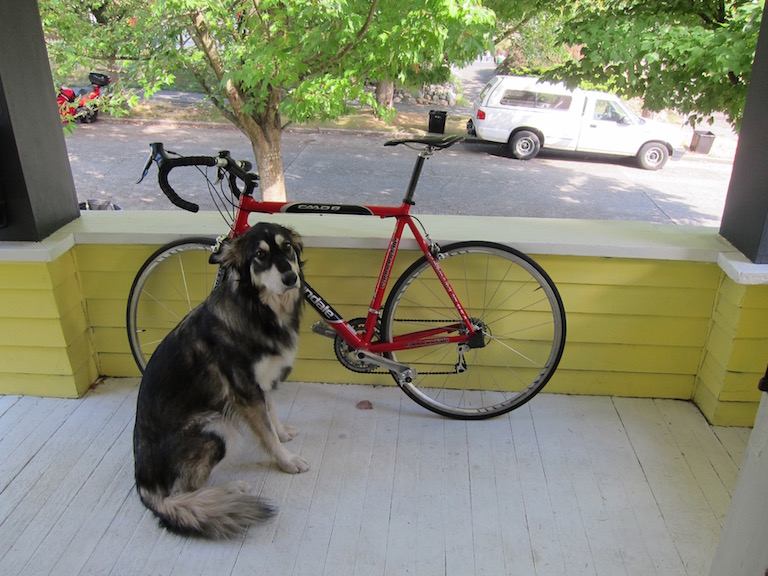

In [3]:
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
img.getWrappedImage()

## Step 2: Load model zoo model

In this example, you load a SSD (Single Shot MultiBox Detector) model from the MXNet model zoo.
For more information about model zoo, see the [Model Zoo Documentation](https://github.com/deepjavalibrary/djl/blob/master/docs/model-zoo.md) 

In [4]:
var criteria = Criteria.builder()
    .setTypes(Image.class, DetectedObjects.class)
    .optArtifactId("ssd")
    .optProgress(new ProgressBar())
    .build();
var model = criteria.loadModel();

Downloading: 100% |████████████████████████████████████████|
Loading:     100% |████████████████████████████████████████|


[IJava-executor-0] INFO ai.djl.mxnet.jna.LibUtils - Downloading libgfortran.so.3 ...
[IJava-executor-0] INFO ai.djl.mxnet.jna.LibUtils - Downloading libgomp.so.1 ...
[IJava-executor-0] INFO ai.djl.mxnet.jna.LibUtils - Downloading libquadmath.so.0 ...
[IJava-executor-0] INFO ai.djl.mxnet.jna.LibUtils - Downloading libopenblas.so.0 ...
[IJava-executor-0] INFO ai.djl.mxnet.jna.LibUtils - Downloading libmxnet.so ...


## Step 3: Create Predictor and detect an object in the image

In [5]:
var detections = model.newPredictor().predict(img);

detections

[
	{"class": "car", "probability": 0.99991, "bounds": {"x"=0.612, "y"=0.137, "width"=0.293, "height"=0.160}}
	{"class": "bicycle", "probability": 0.95348, "bounds": {"x"=0.162, "y"=0.208, "width"=0.594, "height"=0.589}}
	{"class": "dog", "probability": 0.93565, "bounds": {"x"=0.168, "y"=0.350, "width"=0.274, "height"=0.594}}
]

## Check detected result

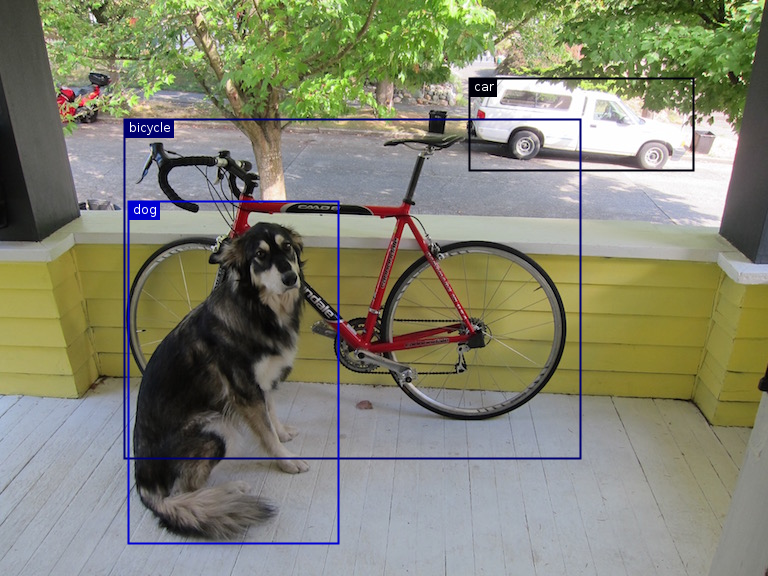

In [6]:
img.drawBoundingBoxes(detections);
img.getWrappedImage()

## Summary

Using the model zoo model provided, you can run inference with just the following lines of code:

```
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
var criteria = Criteria.builder()
    .setTypes(Image.class, DetectedObjects.class)
    .optArtifactId("ssd")
    .build();
var model = criteria.loadModel();
var detections = model.newPredictor().predict(img);
```

You can find full SsdExample source code [here](https://github.com/deepjavalibrary/djl/blob/master/examples/docs/object_detection.md).
